In [1]:
import nibabel as nib 
import numpy as np 
import matplotlib.pyplot as plt 
from skimage.util import view_as_blocks
import os 

In [4]:
train_path = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/train"
bone = "inspiratory_BONE"
std = "expiratory_STANDARD"

lungmasks = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/lungmasks"

bone_kernels = sorted(os.listdir(os.path.join(train_path, bone)))
std_kernels = sorted(os.listdir(os.path.join(train_path, std)))

bone_masks = sorted(os.listdir(os.path.join(lungmasks, bone, "lung_mask")))
std_masks = sorted(os.listdir(os.path.join(lungmasks, std, "lung_mask")))

In [5]:
bone_kernels[0], bone_masks[0]

('COPDGene_A16009_BONE.nii.gz', 'COPDGene_A16009_BONE.nii.gz')

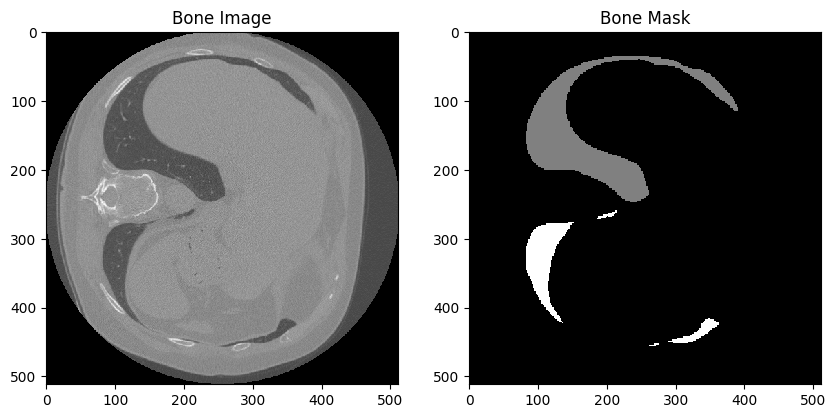

In [6]:
bone_img = nib.load(os.path.join(train_path, bone, bone_kernels[0])).get_fdata()
bone_mask = nib.load(os.path.join(lungmasks, bone, "lung_mask", bone_masks[0])).get_fdata()

#Plot image and mask side by side for middle slice 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(bone_img[:, :, 128], cmap="gray")
plt.title("Bone Image")
plt.subplot(1, 2, 2)
plt.imshow(bone_mask[:, :, 128], cmap="gray")
plt.title("Bone Mask")
plt.show()

In [7]:
np.unique(bone_mask)

array([0., 1., 2.])

In [8]:
#Threshold all values greater than 0 to 1
bone_mask[bone_mask > 0] = 1
np.unique(bone_mask)

array([0., 1.])

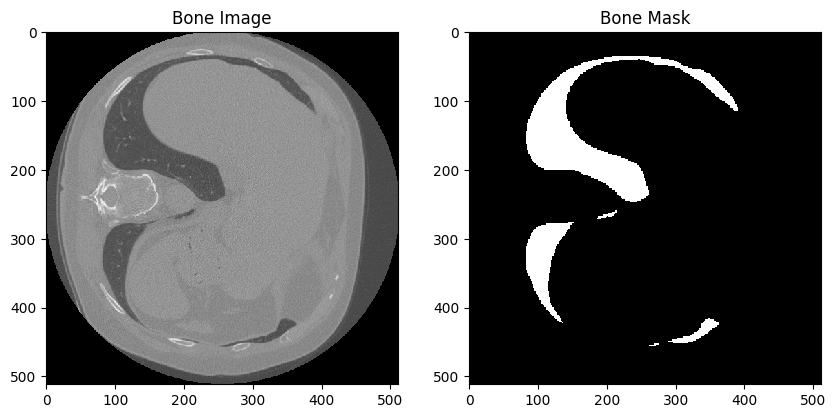

In [9]:
#Plot image and mask side by side for middle slice
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(bone_img[:, :, 128], cmap="gray")
plt.title("Bone Image")
plt.subplot(1, 2, 2)
plt.imshow(bone_mask[:, :, 128], cmap="gray")
plt.title("Bone Mask")
plt.show()

In [ ]:
#For every slice, use the lung mask and the image to obtain a patch in the lung region
#The patch will be of size 

#Get the indices of the lung mask
lung_mask_indices = np.where(bone_mask == 1)

#Get the minimum and maximum indices for each dimension
min_x, max_x = np.min(lung_mask_indices[0]), np.max(lung_mask_indices[0])
min_y, max_y = np.min(lung_mask_indices[1]), np.max(lung_mask_indices[1])
min_z, max_z = np.min(lung_mask_indices[2]), np.max(lung_mask_indices[2])
